<a href="https://colab.research.google.com/github/lMiaul/SI_TF/blob/main/Regresion_polinomico_modelos_aprendizaje_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librerias

Las librerías usadas son:
------------------------------------------------------------------------
pandas: manipulación de datos. numpy: operaciones numéricas. matplotlib.pyplot: visualización de datos. google.colab.files: subir archivos en Google Colab. sklearn.preprocessing.PolynomialFeatures: generar características polinómicas. sklearn.linear_model.LinearRegression : modelo de regresión lineal. sklearn.metrics.mean_squared_error: calcular el error cuadrático medio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline

#Cargar Datos

Nos permite cargar el archivo Excel del la base de datos desde la computadora a Google Drive

In [ ]:
# Cargar el archivo Excel desde el computador al Drive
uploaded = files.upload()

# Nombre del archivo que se ha subido
filename = list(uploaded.keys())[0]

# Leer el archivo Excel en un DataFrame de la librería pandas
data = pd.read_excel(filename)

Saving base de datos1.xlsx to base de datos1.xlsx


Asimismo, también podemos extraelo dentro de un archivo dentro de nuestro propio drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Leer el archivo Excel en un DataFrame de la librería pandas
data = pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes/B. Generación Anual de residuos municipal_Distrital_2014_2021_0_ST.csv', encoding='utf-8')
data.head()

Mounted at /content/drive


,FECHA_CORTE,N_SEC,UBIGEO,REG_NAT,DEPARTAMENTO,PROVINCIA,DISTRITO,POB_TOTAL,POB_URBANA,POB_RURAL,QRESIDUOS_MUN,PERIODO
0,9/01/2023,1,10101,SELVA,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,28423,27548,875,6939.28,2014
1,9/01/2023,2,10102,SELVA,AMAZONAS,CHACHAPOYAS,ASUNCION,291,151,140,47.95,2014
2,9/01/2023,3,10103,SIERRA,AMAZONAS,CHACHAPOYAS,BALSAS,1615,299,1316,69.95,2014
3,9/01/2023,4,10104,SIERRA,AMAZONAS,CHACHAPOYAS,CHETO,597,388,209,90.84,2014
4,9/01/2023,5,10105,SIERRA,AMAZONAS,CHACHAPOYAS,CHILIQUIN,737,197,540,46.26,2014


# Reprocesamiento de los datos


Aqui se realiza el preprocesamiento de datos para su posterior análisis. Primero, elimina los espacios en blanco de los nombres de las columnas. Posteriormente se selecciona solo las columnas: 'DEPARTAMENTO', 'QRESIDUOS_MUN' y 'PERIODO', esto facilita la verificación y análisis de la información procesada.

In [3]:
#Permite que se eliminen los espacios en blanco
data.columns = data.columns.str.strip()

# Seleccion de columna de interes
data = data[['DEPARTAMENTO', 'QRESIDUOS_MUN', 'PERIODO']]

# Agrupar departamento y año para tener las sumas de los valores
grouped_data = data.groupby(['DEPARTAMENTO', 'PERIODO']).sum().reset_index()

# Obtener la lista de departamentos unicos
departamentos = grouped_data['DEPARTAMENTO'].unique()

# Mostrar las primeras filas de la agrupación del DataFrame
grouped_data.head()

,DEPARTAMENTO,PERIODO,QRESIDUOS_MUN
0,AMAZONAS,2014,52410.66
1,AMAZONAS,2015,50583.02
2,AMAZONAS,2016,50997.53
3,AMAZONAS,2017,51474.45
4,AMAZONAS,2018,54454.85


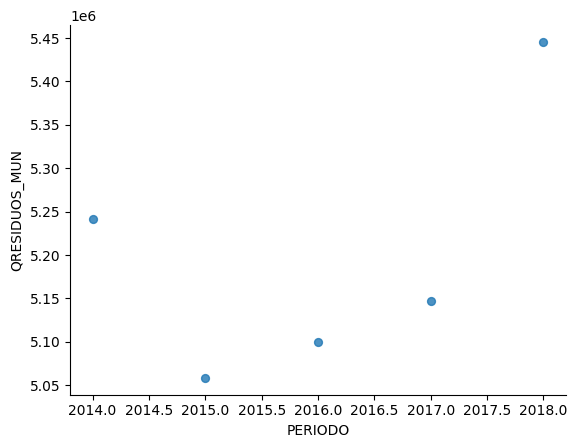

In [ ]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='PERIODO', y='QRESIDUOS_MUN', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Grafica de los residuos totales y el periodo

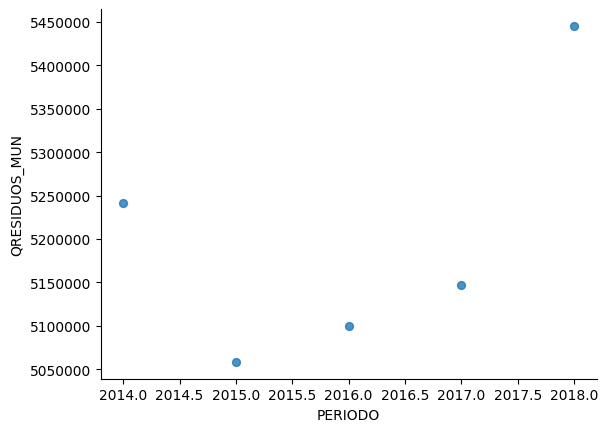

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que _df_2 es tu DataFrame
_df_2.plot(kind='scatter', x='PERIODO', y='QRESIDUOS_MUN', s=32, alpha=.8)

# Desactivar notación científica en el eje y
plt.gca().ticklabel_format(style='plain', axis='y')

# Opcionalmente, también puedes ajustar el formato del eje x si es necesario
# plt.gca().ticklabel_format(style='plain', axis='x')

# Hacer invisibles las espinas superior y derecha
plt.gca().spines[['top', 'right']].set_visible(False)

# Mostrar la gráfica
plt.show()


# Modelo de Regresión Polinómica

Se ajusta modelos de regresión polinómica para predecir los residuos municipales para cada departamento, se guarda estos modelos en un diccionario, lo que permite realizar predicciones específicas para cada departamento. se entrena con los datos del departamento actual. Finalmente, se almacena el modelo entrenado en un diccionario, donde la clave es el nombre del departamento y el valor es el modelo de regresión asociado.

In [4]:
# Crear diccionarios para almacenar los modelos por departamento
models_poly_dict = {}
models_sgd_dict = {}

# Definir el grado del polinomio para la regresión
degree = 2

# Crear el objeto PolynomialFeatures para generar características polinómicas
poly = PolynomialFeatures(degree=degree)

# Para cada departamento, ajustar un modelo de regresión polinómica y un modelo de SGDRegressor
for departamento in departamentos:
    # Filtrar los datos del departamento
    dept_data = grouped_data[grouped_data['DEPARTAMENTO'] == departamento]
    # Extraer la columna Periodo como característica X
    X = dept_data[['PERIODO']]
    # Extraer la columna QRESIDUOS_MUN como objetivo y
    y = dept_data['QRESIDUOS_MUN']

    # Transformar las características en características polinómicas
    X_poly = poly.fit_transform(X)

    # Crear y entrenar el modelo de regresión polinómica
    modelo_polinomico = LinearRegression()
    modelo_polinomico.fit(X_poly, y)

    # Guardar el modelo en el diccionario
    models_poly_dict[departamento] = modelo_polinomico

    # Crear y entrenar el modelo de regresión con SGD
    sgd_pipeline = make_pipeline(PolynomialFeatures(degree), StandardScaler(), SGDRegressor(max_iter=50000, tol=1e-3, random_state=42, learning_rate='optimal', eta0=0.01))
    sgd_pipeline.fit(X, y)

    # Guardar el modelo en el diccionario
    models_sgd_dict[departamento] = sgd_pipeline

# Predicción de los datos

Se itera sobre cada departamento en el conjunto de datos y utiliza los modelos de regresión polinómica previamente entrenados para hacer predicciones sobre la cantidad de residuos para los próximos 10 años. Para cada departamento, el código obtiene el último año conocido, genera un conjunto de datos para los próximos 10 años y luego utiliza el modelo correspondiente para predecir la cantidad de residuos para esos años. Las predicciones se almacenan en un diccionario, donde cada departamento tiene asociadas sus predicciones para los próximos 10 años.

In [6]:

# Crear un diccionario vacío para almacenar las predicciones por departamento
predictions_poly_dict = {}
predictions_sgd_dict = {}


# Para cada departamento, hacer predicciones para los años 2024 y 2025
for departamento in departamentos:
    # Obtener el modelo entrenado para el departamento
    modelo_polinomico = models_poly_dict[departamento]
    modelo_sgd = models_sgd_dict[departamento]

    # Generar un DataFrame con los años 2024 y 2025 con la columna 'PERIODO'
    periodos_futuros = pd.DataFrame({'PERIODO': [2024, 2025]})

    # Transformar los periodos futuros en características polinómicas
    X_poly_futuro = poly.transform(periodos_futuros)
    # Hacer predicciones para los años 2024 y 2025
    predicciones_futuras_poly = modelo_polinomico.predict(X_poly_futuro)
    predicciones_futuras_sgd = modelo_sgd.predict(periodos_futuros)

    # Guardar las predicciones en el diccionario
    predictions_poly_dict[departamento] = predicciones_futuras_poly
    predictions_sgd_dict[departamento] = predicciones_futuras_sgd

# Crear un DataFrame con las predicciones para los años 2024 y 2025
predicciones_tabla = []
for departamento in departamentos:
    predicciones_tabla.append([departamento, 2024, predictions_poly_dict[departamento][0], predictions_sgd_dict[departamento][0]])
    predicciones_tabla.append([departamento, 2025, predictions_poly_dict[departamento][1], predictions_sgd_dict[departamento][1]])

predicciones_df = pd.DataFrame(predicciones_tabla, columns=['DEPARTAMENTO', 'AÑO', 'PREDICCION_POLINOMICA', 'PREDICCION_SGD'])

# Configurar pandas para mostrar floats sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# Mostrar la tabla de predicciones
print(predicciones_df)

     DEPARTAMENTO   AÑO  PREDICCION_POLINOMICA     PREDICCION_SGD
0        AMAZONAS  2024               48551.81  24940869578016.50
1        AMAZONAS  2025               46314.38  27778814795103.86
2          ANCASH  2024              264701.40 -13720793167468.02
3          ANCASH  2025              270922.67 -14965164688188.84
4        APURIMAC  2024               54188.79  31884616444219.36
5        APURIMAC  2025               49985.17  35916048971083.91
6        AREQUIPA  2024              371307.62  68605616446764.85
7        AREQUIPA  2025              375436.94  79550280857038.97
8        AYACUCHO  2024              120756.40 -11089733488836.78
9        AYACUCHO  2025              116856.75 -12000362309212.70
10      CAJAMARCA  2024              170368.17  13949032861090.44
11      CAJAMARCA  2025              177621.73  14666244067506.92
12         CALLAO  2024              511898.31  68795438677038.85
13         CALLAO  2025              574174.20  79583018988260.59
14        

#Visualización de las predicciones

Se genera una figura con subgráficos (subplots), cada subplot representa un departamento diferente. Para cada subplot, se muestran los datos históricos de residuos como puntos azules, la línea de ajuste histórico (obtenida a través del modelo de regresión polinómica) como una línea punteada verde y las predicciones de residuos para los próximos 10 años como una línea roja. Esto se repite para cada departamento, y las etiquetas adecuadas se agregan a los ejes y los subplots se ajustan automáticamente para evitar superposiciones.

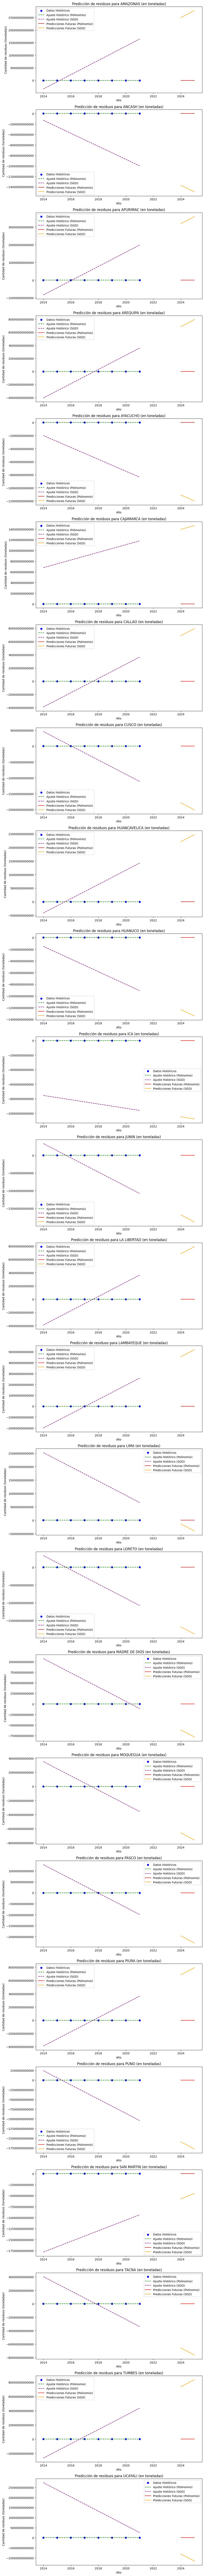

In [7]:
# Configurar pandas para mostrar floats sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# Crear una figura con subplots para cada departamento
fig, axs = plt.subplots(len(departamentos), 1, figsize=(10, 5 * len(departamentos)))

# Lista para almacenar las predicciones en formato de tabla
predicciones_tabla = []

# Para cada subplot, mostrar los datos históricos y la predicción para los próximos años
for idx, departamento in enumerate(departamentos):
    # Filtrar los datos del departamento
    dept_data = grouped_data[grouped_data['DEPARTAMENTO'] == departamento]
    # Extraer la columna Periodo como característica X
    X = dept_data[['PERIODO']]
    # Extraer la columna QRESIDUOS_MUN como objetivo y
    y = dept_data['QRESIDUOS_MUN']
    # Obtener los modelos entrenados para el departamento actual
    modelo_polinomico = models_poly_dict[departamento]
    modelo_sgd = models_sgd_dict[departamento]
    # Obtener las predicciones para los próximos años
    predicciones_futuras_poly = predictions_poly_dict[departamento]
    predicciones_futuras_sgd = predictions_sgd_dict[departamento]

    # Añadir predicciones a la tabla
    predicciones_tabla.append([departamento, 2024, predicciones_futuras_poly[0], predicciones_futuras_sgd[0]])
    predicciones_tabla.append([departamento, 2025, predicciones_futuras_poly[1], predicciones_futuras_sgd[1]])

    # Graficar los datos históricos como puntos azules
    axs[idx].scatter(X, y, color='blue', label='Datos Históricos')
    # Graficar la línea de regresión polinómica (ajuste histórico) como una línea verde
    periodos_historicos = np.arange(min(X['PERIODO']), max(X['PERIODO']) + 1).reshape(-1, 1)
    periodos_historicos_df = pd.DataFrame(periodos_historicos, columns=['PERIODO'])
    X_poly_historicos = poly.transform(periodos_historicos_df)
    axs[idx].plot(periodos_historicos, modelo_polinomico.predict(X_poly_historicos), color='green', linestyle='--', label='Ajuste Histórico (Polinomio)')
    # Graficar la línea de regresión con SGD (ajuste histórico) como una línea morada
    axs[idx].plot(periodos_historicos, modelo_sgd.predict(periodos_historicos_df), color='purple', linestyle='--', label='Ajuste Histórico (SGD)')
    # Graficar las predicciones para los próximos años como una línea roja
    periodos_futuros_plot = np.array([2024, 2025]).reshape(-1, 1)
    periodos_futuros_plot_df = pd.DataFrame(periodos_futuros_plot, columns=['PERIODO'])
    axs[idx].plot(periodos_futuros_plot, predicciones_futuras_poly, color='red', label='Predicciones Futuras (Polinomio)')
    axs[idx].plot(periodos_futuros_plot, predicciones_futuras_sgd, color='orange', label='Predicciones Futuras (SGD)')

    # Desactivar notación científica en el eje y
    axs[idx].ticklabel_format(style='plain', axis='y')

    # Configurar el título del subplot
    axs[idx].set_title(f'Predicción de residuos para {departamento} (en toneladas)')
    # Etiqueta del eje X
    axs[idx].set_xlabel('Año')
    # Etiqueta del eje Y
    axs[idx].set_ylabel('Cantidad de residuos (toneladas)')
    axs[idx].legend()

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()




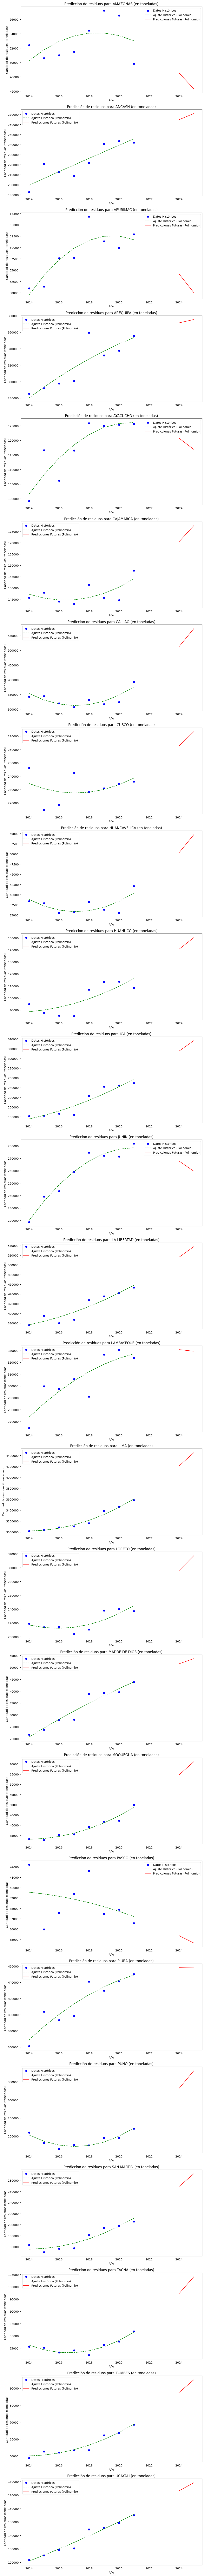

In [8]:
# Configurar pandas para mostrar floats sin notación científica
pd.options.display.float_format = '{:.2f}'.format

# Crear una figura con subplots para cada departamento
fig, axs = plt.subplots(len(departamentos), 1, figsize=(10, 5 * len(departamentos)))

# Lista para almacenar las predicciones en formato de tabla
predicciones_tabla = []

# Para cada subplot, mostrar los datos históricos y la predicción para los próximos años
for idx, departamento in enumerate(departamentos):
    # Filtrar los datos del departamento
    dept_data = grouped_data[grouped_data['DEPARTAMENTO'] == departamento]
    # Extraer la columna Periodo como característica X
    X = dept_data[['PERIODO']]
    # Extraer la columna QRESIDUOS_MUN como objetivo y
    y = dept_data['QRESIDUOS_MUN']
    # Obtener los modelos entrenados para el departamento actual
    modelo_polinomico = models_poly_dict[departamento]
    # Obtener las predicciones para los próximos años
    predicciones_futuras_poly = predictions_poly_dict[departamento]

    # Añadir predicciones a la tabla
    predicciones_tabla.append([departamento, 2024, predicciones_futuras_poly[0]])
    predicciones_tabla.append([departamento, 2025, predicciones_futuras_poly[1]])

    # Graficar los datos históricos como puntos azules
    axs[idx].scatter(X, y, color='blue', label='Datos Históricos')
    # Graficar la línea de regresión polinómica (ajuste histórico) como una línea verde
    periodos_historicos = np.arange(min(X['PERIODO']), max(X['PERIODO']) + 1).reshape(-1, 1)
    periodos_historicos_df = pd.DataFrame(periodos_historicos, columns=['PERIODO'])
    X_poly_historicos = poly.transform(periodos_historicos_df)
    axs[idx].plot(periodos_historicos, modelo_polinomico.predict(X_poly_historicos), color='green', linestyle='--', label='Ajuste Histórico (Polinomio)')
    # Graficar las predicciones para los próximos años como una línea roja
    periodos_futuros_plot = np.array([2024, 2025]).reshape(-1, 1)
    periodos_futuros_plot_df = pd.DataFrame(periodos_futuros_plot, columns=['PERIODO'])
    axs[idx].plot(periodos_futuros_plot, predicciones_futuras_poly, color='red', label='Predicciones Futuras (Polinomio)')

    # Desactivar notación científica en el eje y
    axs[idx].ticklabel_format(style='plain', axis='y')

    # Configurar el título del subplot
    axs[idx].set_title(f'Predicción de residuos para {departamento} (en toneladas)')
    # Etiqueta del eje X
    axs[idx].set_xlabel('Año')
    # Etiqueta del eje Y
    axs[idx].set_ylabel('Cantidad de residuos (toneladas)')
    axs[idx].legend()

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()